In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("used_cars_data.csv",index_col=0)
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


##### Observation:
    1.Total rows 7253
    2. Contains null values
    3.data types obj,int,float
    4.maximum null value in new_price
    

In [4]:
df.describe() # it is performed only on integer datatype hence we have very less int columns

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [6]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [7]:
# df['Power'].apply(lambda x:float(str(x).split()[0])) # we have a string value in column
# df['Power'].apply(lambda x:pd.isnull(x)==True)
# df['Power'].str.split().str.get(0)

In [8]:
def convert(x):
    if not pd.isnull(x):
        try:
            return float(x.split()[0])
        except Exception:
            return np.nan
    else:
        return np.nan

In [9]:
# df['Power']= df['Power'].apply(convert)
df['Power'] = pd.to_numeric(df['Power'].str.split().str.get(0),errors='coerce')

In [10]:
# df['Engine'] = df['Engine'].apply(convert)
df['Engine'] = pd.to_numeric(df['Engine'].str.split().str.get(0),errors='coerce')

In [11]:
df['Mileage'] = pd.to_numeric(df['Mileage'].str.split().str.get(0),errors='coerce')

In [12]:
df.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00


In [13]:
df.drop(inplace= True,errors ='ignore',columns='New_Price')

In [14]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50


In [15]:
pd.get_dummies(df['Transmission'])# get dummies break down the col into category

,Automatic,Manual
S.No.,,
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7248,0,1
7249,1,0
7250,0,1


In [16]:
df['Manual'] = pd.get_dummies(df['Transmission'],drop_first=True) # conveting ur data into desired form
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manual
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,1


In [17]:
df["Fuel_Type"].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [18]:
df = pd.concat([df,df["Fuel_Type"].str.get_dummies()],axis=1)
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manual,CNG,Diesel,Electric,LPG,Petrol
S.No.,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,1,0,1,0,0,0


In [19]:
df['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [20]:
df = pd.concat([df,df['Owner_Type'].str.get_dummies()],axis=1)
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,1,1,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,1,0,1,0,0,0,1,0,0,0


In [21]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Manual', 'CNG', 'Diesel', 'Electric', 'LPG', 'Petrol',
       'First', 'Fourth & Above', 'Second', 'Third'],
      dtype='object')

In [26]:
df["Seats"].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Manual             7253 non-null   uint8  
 13  CNG                7253 non-null   int64  
 14  Diesel             7253 non-null   int64  
 15  Electric           7253 non-null   int64  
 16  LPG                7253 

In [46]:
df['Name'] = df['Name'].apply(lambda x:x.split()[0])
df = pd.concat([df, pd.get_dummies(df['Name'])],axis=1)
df.drop('Name',axis=1, inplace = True)

In [47]:
df = pd.concat([df, pd.get_dummies(df['Location'])], axis = 1)
df.drop('Location',axis=1, inplace = True)

In [52]:
df.drop(['Fuel_Type','Owner_Type'],axis=1, inplace=True)

In [59]:
df.drop(['Transmission'],axis=1, inplace=True)

### Study the data

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'KMs')

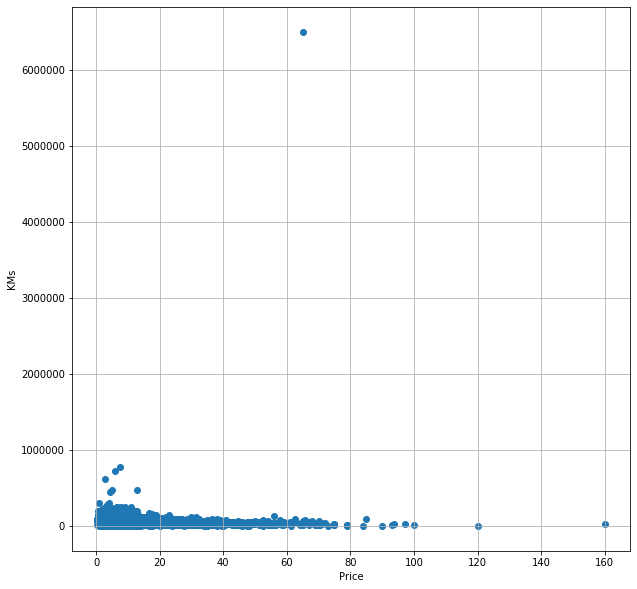

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price'],df['Kilometers_Driven'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('KMs')

Text(0, 0.5, 'Mileage')

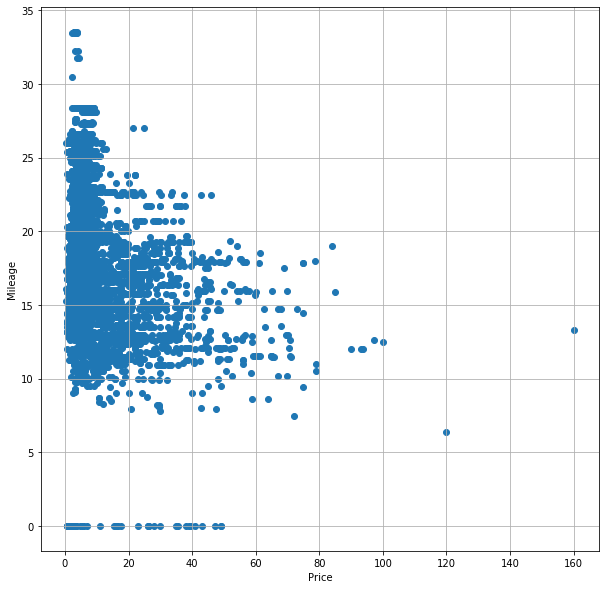

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price'],df['Mileage'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('Mileage')

Text(0, 0.5, 'Power')

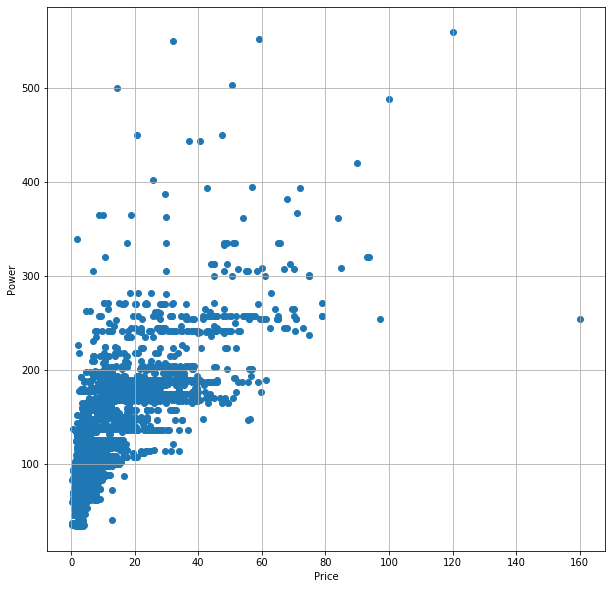

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price'],df['Power'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('Power')

Text(0, 0.5, 'KMs')

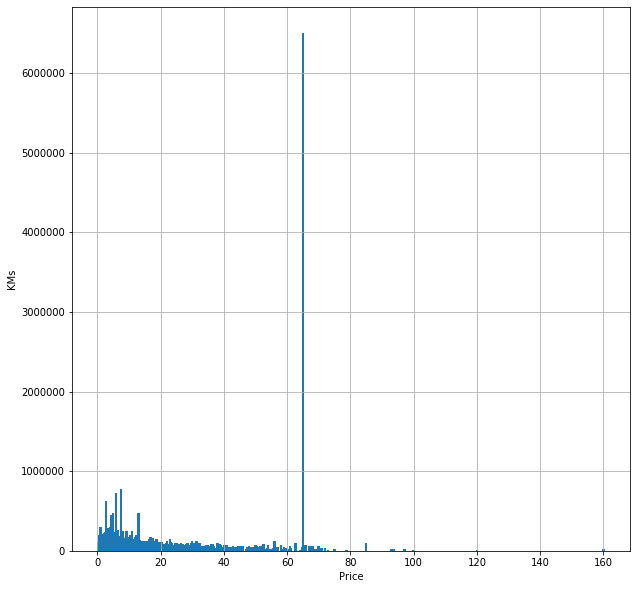

In [38]:
plt.figure(figsize=(10,10))
plt.bar(df['Price'],df['Kilometers_Driven'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('KMs')

Text(0, 0.5, 'Power')

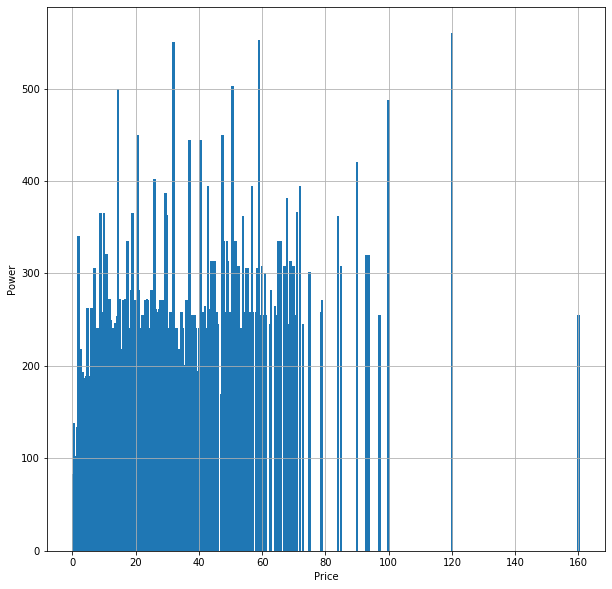

In [39]:
plt.figure(figsize=(10,10))
plt.bar(df['Price'],df['Power'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('Power')

In [65]:
df.interpolate(method='linear',limit_direction='forward')

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manual,CNG,Diesel,...,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011,89411,20.54,1598.0,103.60,5.0,2.50,1,0,1,...,0,0,0,0,1,0,0,0,0,0
7249,2015,59000,17.21,1197.0,103.60,5.0,2.50,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7250,2012,28000,23.08,1461.0,63.10,5.0,2.50,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Mileage            5872 non-null   float64
 3   Engine             5872 non-null   float64
 4   Power              5872 non-null   float64
 5   Seats              5872 non-null   float64
 6   Price              5872 non-null   float64
 7   Manual             5872 non-null   uint8  
 8   CNG                5872 non-null   int64  
 9   Diesel             5872 non-null   int64  
 10  Electric           5872 non-null   int64  
 11  LPG                5872 non-null   int64  
 12  Petrol             5872 non-null   int64  
 13  First              5872 non-null   int64  
 14  Fourth & Above     5872 non-null   int64  
 15  Second             5872 non-null   int64  
 16  Third              5872 

In [67]:
df.dropna(inplace=True)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Price',axis=1),df['Price'],test_size=0.2,random_state = 101)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression().fit(xtrain,ytrain)

In [76]:
model.score(xtest,ytest)

0.7316283597646255

In [82]:
# from sklearn.linear_model import Ridge

In [85]:
# model = ridge_regression().fit(xtrain,ytrain,)

In [84]:
# r = Ridge(alpha=alpha,normalize=True)
# r.fit(xtrain,ytrain)